# Basics

Importamos librerías

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats

Otras configuraciones

In [2]:
pd.set_option('display.max_columns', None)

## Datos a Trabajar

Coffee Quality database from CQI  
Fuente: [Kaggle](https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi)  
Fuente original: [Coffee Quality Institute](https://database.coffeeinstitute.org/)

In [40]:
arabica = pd.read_csv('../data/raw/arabica_data_cleaned.csv')
robusta = pd.read_csv('../data/raw/robusta_data_cleaned.csv')
cafe = pd.read_csv('../data/raw/merged_data_cleaned.csv')

### Información

En el dataset se pueden encontrar datos como bien pueden ser las propiedades organolépticas del café, como pueden ser aroma, sabor, regusto, acidez, cuerpo, balance, uniformidad, dulzura, humedad, aspecto del fruto y del grano.  
También se pueden encontrar algunas otras características complementarias:  
Limpieza de la taza o más información como el país de origen, nombre de la granja así como su altitud, tipo de procesado aplicado y certificación.

El target en este caso sería la columna representada como "Total.Cup.Points", que es una sumatoria de las diez características principales del catado, que a su vez se registran en una escala de diez puntos, siendo la calidad total una cifra en base a un total a 100 puntos.

### Objetivo

En principio el objetivo es determinar la calidad del café, que bien podría hacerse a través de sus propiedades organolépticas, pero al ser una suma, no tendría sentido abordarlo con un modelo de machine learning, por lo que se plantea determinar la misma calidad del café a través de otras características como pueden ser su país de origen o procesado; o incluso abordar propiedades organolépticas que no están incluidas en la sumatoria del cálculo de calidad, como puede ser la humedad del grano o el color de la drupa. 

# EDA

In [4]:
arabica.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [5]:
arabica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1311 non-null   int64  
 1   Species                1311 non-null   object 
 2   Owner                  1304 non-null   object 
 3   Country.of.Origin      1310 non-null   object 
 4   Farm.Name              955 non-null    object 
 5   Lot.Number             270 non-null    object 
 6   Mill                   1001 non-null   object 
 7   ICO.Number             1165 non-null   object 
 8   Company                1102 non-null   object 
 9   Altitude               1088 non-null   object 
 10  Region                 1254 non-null   object 
 11  Producer               1081 non-null   object 
 12  Number.of.Bags         1311 non-null   int64  
 13  Bag.Weight             1311 non-null   object 
 14  In.Country.Partner     1311 non-null   object 
 15  Harv

In [6]:
arabica.describe()

,Unnamed: 0,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1310.000000,1311.000000,1084.000000,1084.000000,1084.000000
mean,656.000763,153.887872,7.563806,7.518070,7.397696,7.533112,7.517727,7.517506,9.833394,9.83312,9.903272,7.497864,82.115927,0.088863,0.426392,0.177099,3.591915,1759.548954,1808.843803,1784.196379
std,378.598733,129.733734,0.378666,0.399979,0.405119,0.381599,0.359213,0.406316,0.559343,0.77135,0.530832,0.474610,3.515761,0.047957,1.832415,0.840583,5.350371,8767.847252,8767.187498,8767.016913
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,328.500000,14.500000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.00000,10.000000,7.250000,81.170000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,656.000000,175.000000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.00000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,983.500000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.00000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1312.000000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.00000,10.000000,10.000000,90.580000,0.280000,31.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


<Figure size 640x480 with 0 Axes>

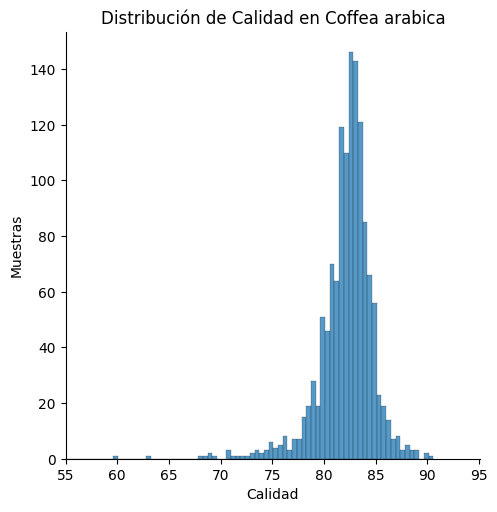

In [7]:
plt.figure()
sns.displot(arabica['Total.Cup.Points'])
plt.title('Distribución de Calidad en Coffea arabica')
plt.xlabel('Calidad')
plt.xlim(left=55)
plt.ylabel('Muestras');

Aquí se puede observar que la gran mayoría de las muestras, según el dataframe, tienen una calidad media superior a los 80 puntos sobre 100.

<Figure size 640x480 with 0 Axes>

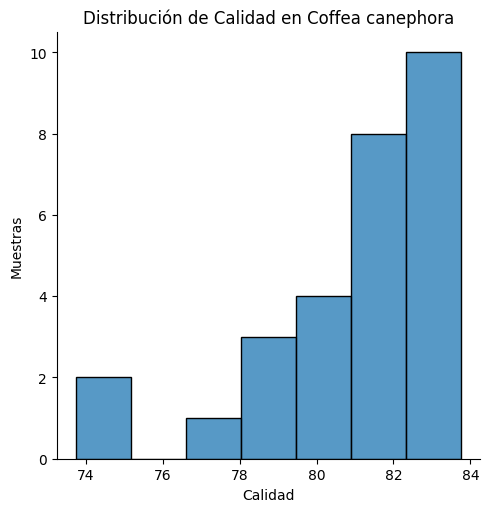

In [8]:
plt.figure()
sns.displot(robusta['Total.Cup.Points'])
plt.title('Distribución de Calidad en Coffea canephora')
plt.xlabel('Calidad')
plt.ylabel('Muestras');

En comparativa la distribución de la calidad de la especie robusta parece menor (no superando los 83 puntos), sin embargo, también es mucho menor el número de registros.  

De momento, no se incluirán los datos de la especie robusta por lo ya mencionado y porque su uso económico suele estar dirigido a productos cafeinados y no infusiones de "consumo directo", por una mala reputación debido a su diferente sabor y su mayor concentración de cafeína.  

Podrían utilizarse estos datos en conjunto a los de la especie arábica para un futuro proyecto de clasificación de especie basado en su "calidad" o bien sus propiedades organolépticas.

#### Correlaciones

En principio, eliminar la columna de Unnamed 0 parecía obvio, sin embargo, al no hacerlo, se puede observar esto:

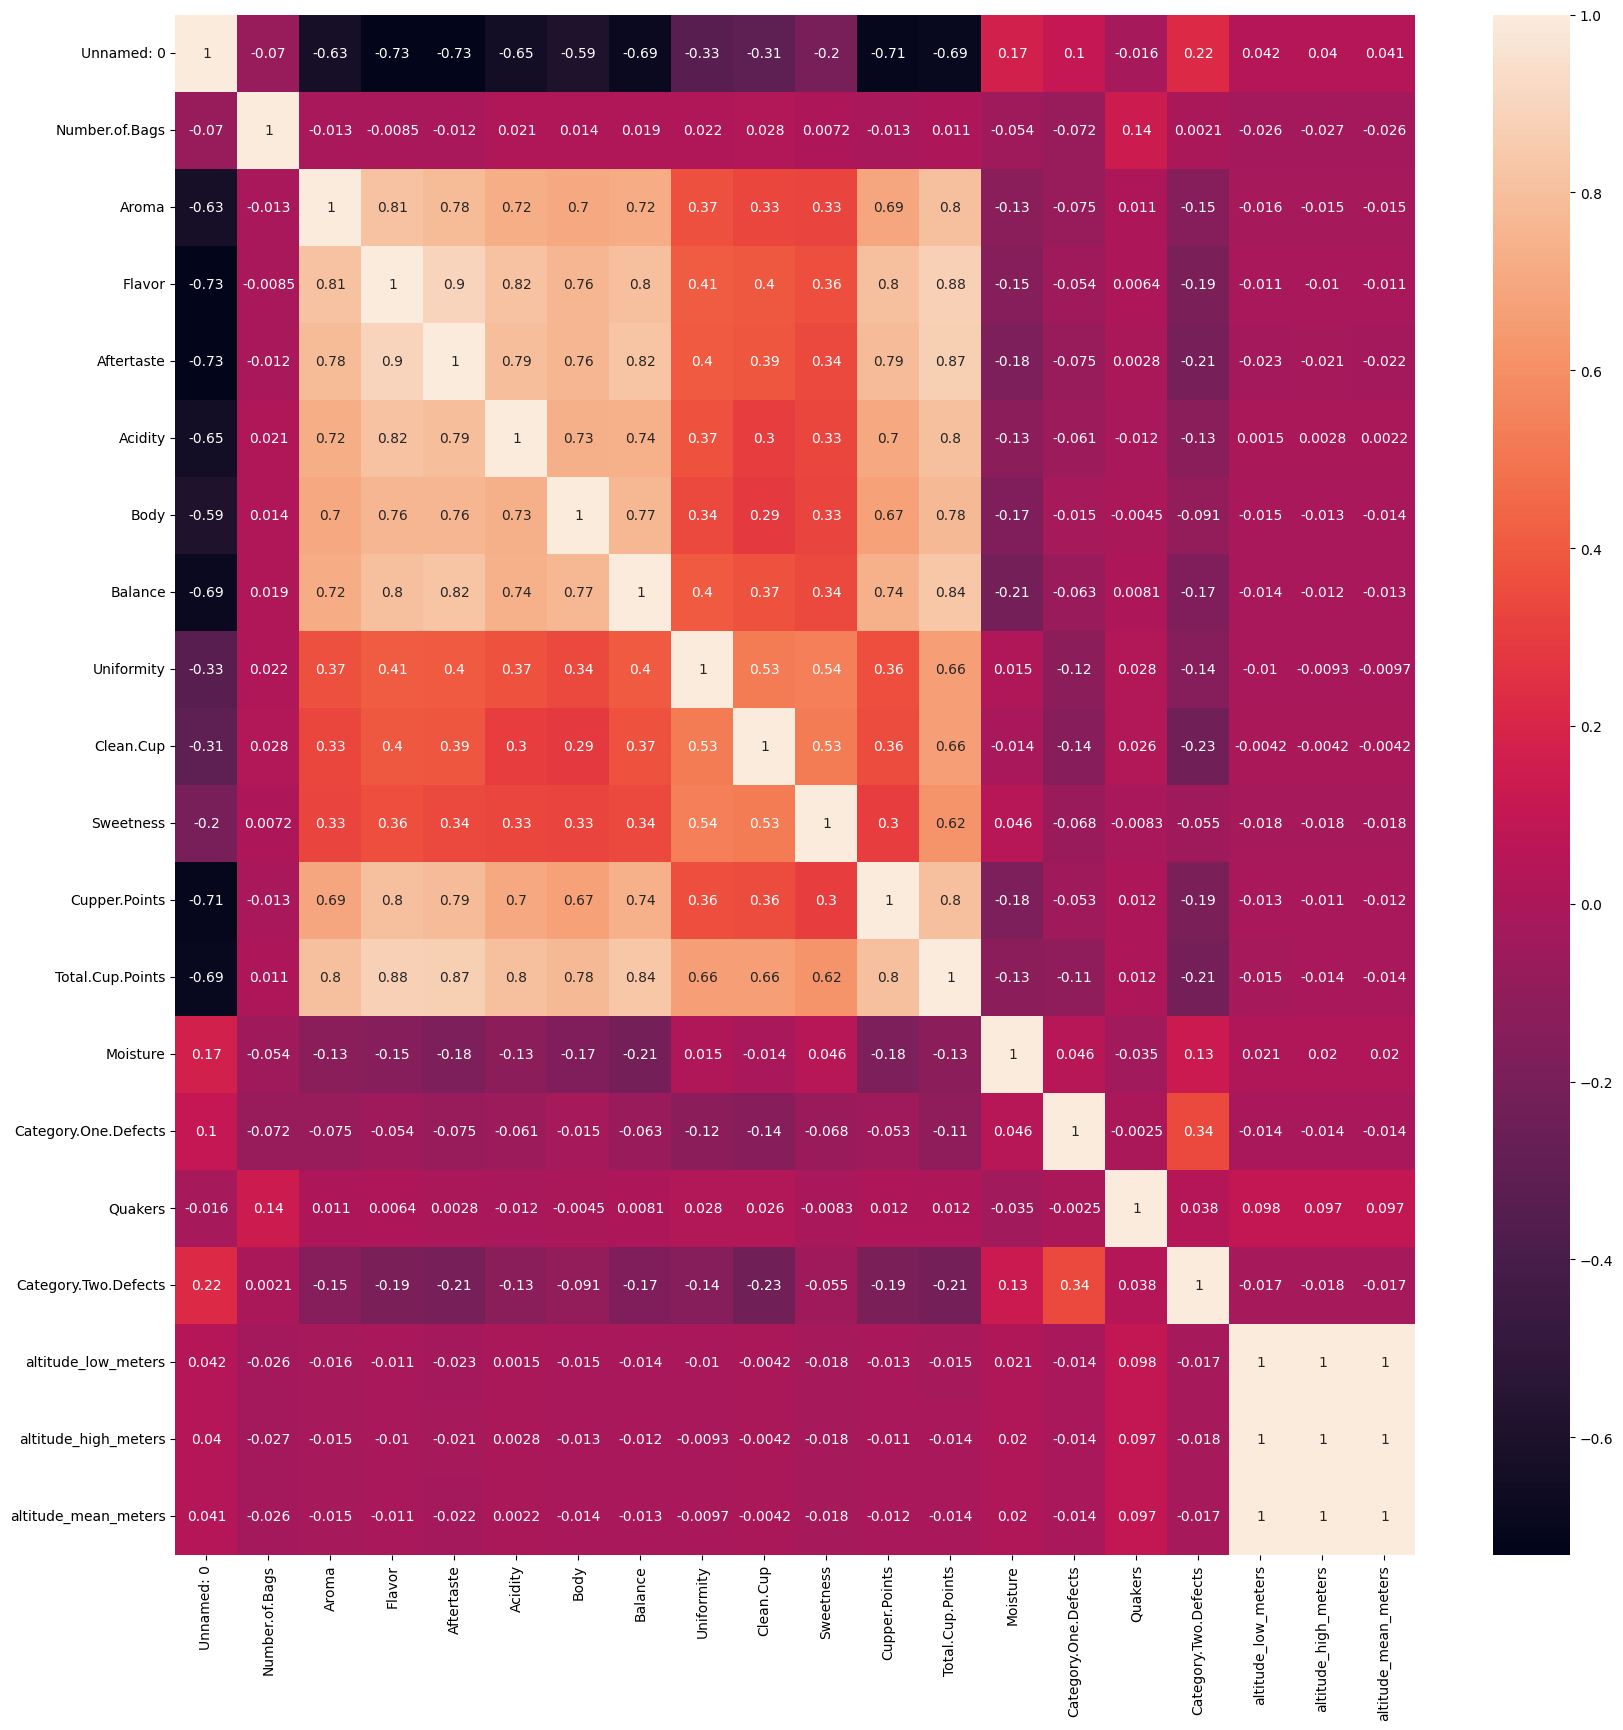

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.read_csv('../data/raw/arabica_data_cleaned.csv').corr(), annot= True);

Se observa una alta correlación negativa entre la columna Unnamed: 0 y el target, es decir, los registros están ordenados por calidad descendende; algo que resulta muy útil para la separación del dataframe en train y test.

También se pueden observar algunas relaciones colineares, como en los campos de altitud; lo que indica que se trata de información redundante y se puede prescindir de dos de esas columnas.

# Variables a Utilizar

Para el modelo de machine learning, como se ha mencionado anteriormente, se han descartado propiedades organolépticas, por lo que se considerarán como variables las siguientes:  

* **Country.of.Origin:** País de origen del café.
* **Variety:** Variedad local del café. No debe confundirse con la especie.
* **Processing.Method:** Método de procesado, que podría ser secado, lavado o descascarillado.
* **Moisture:** Humedad de la drupa
* **Defects:** Cantidad de defectos que posee la drupa, que pueden ser tamaño reducido, golpes.
* **Color:** Color de la drupa, que puede ser verde o puede contener vetas azuladas.
* **Altitude_mean_meters:** Media de altitud del campo de cultivo.
* **Harvest.Year:** Año en que ha sido cosechado el café.

La variable objetivo a predecir (target) se trata de la calidad, que para ser abordada en un modelo de clasificación ha sido modificada en tres categorías: "estándar", "bueno" y "premium".

## Balanceo de Datos

In [21]:
calidad = ['Estándar', 'Bueno', 'Premium']
calif = [0, 80, 85, 100]
arabica['Calidad'] = pd.cut(arabica['Total.Cup.Points'], bins=calif, labels=calidad)
arabica.Calidad.value_counts(normalize=True)

Bueno       0.783206
Estándar    0.143511
Premium     0.073282
Name: Calidad, dtype: float64

En principio, el dataframe se centra en muestras de calidad media, por lo que se encuentra desbalanceado, siendo mucho menor la cantidad de muestras indeseables. Puede observarse mejor en la siguiente gráfica.

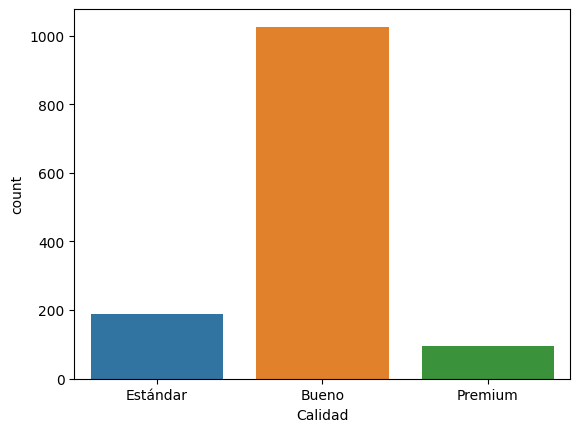

In [22]:
sns.countplot(data=arabica, x='Calidad');

Después del procesado, el balanceo es el siguiente:

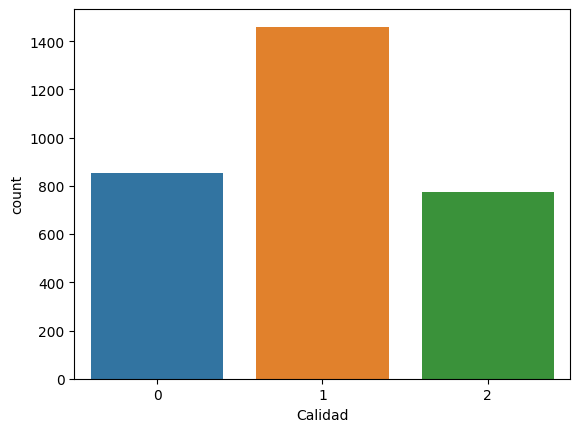

In [29]:
procesado = pd.read_csv('../data/processed/arabica_processed.csv')
sns.countplot(data=procesado, x='Calidad');

## Distribución de las Variables

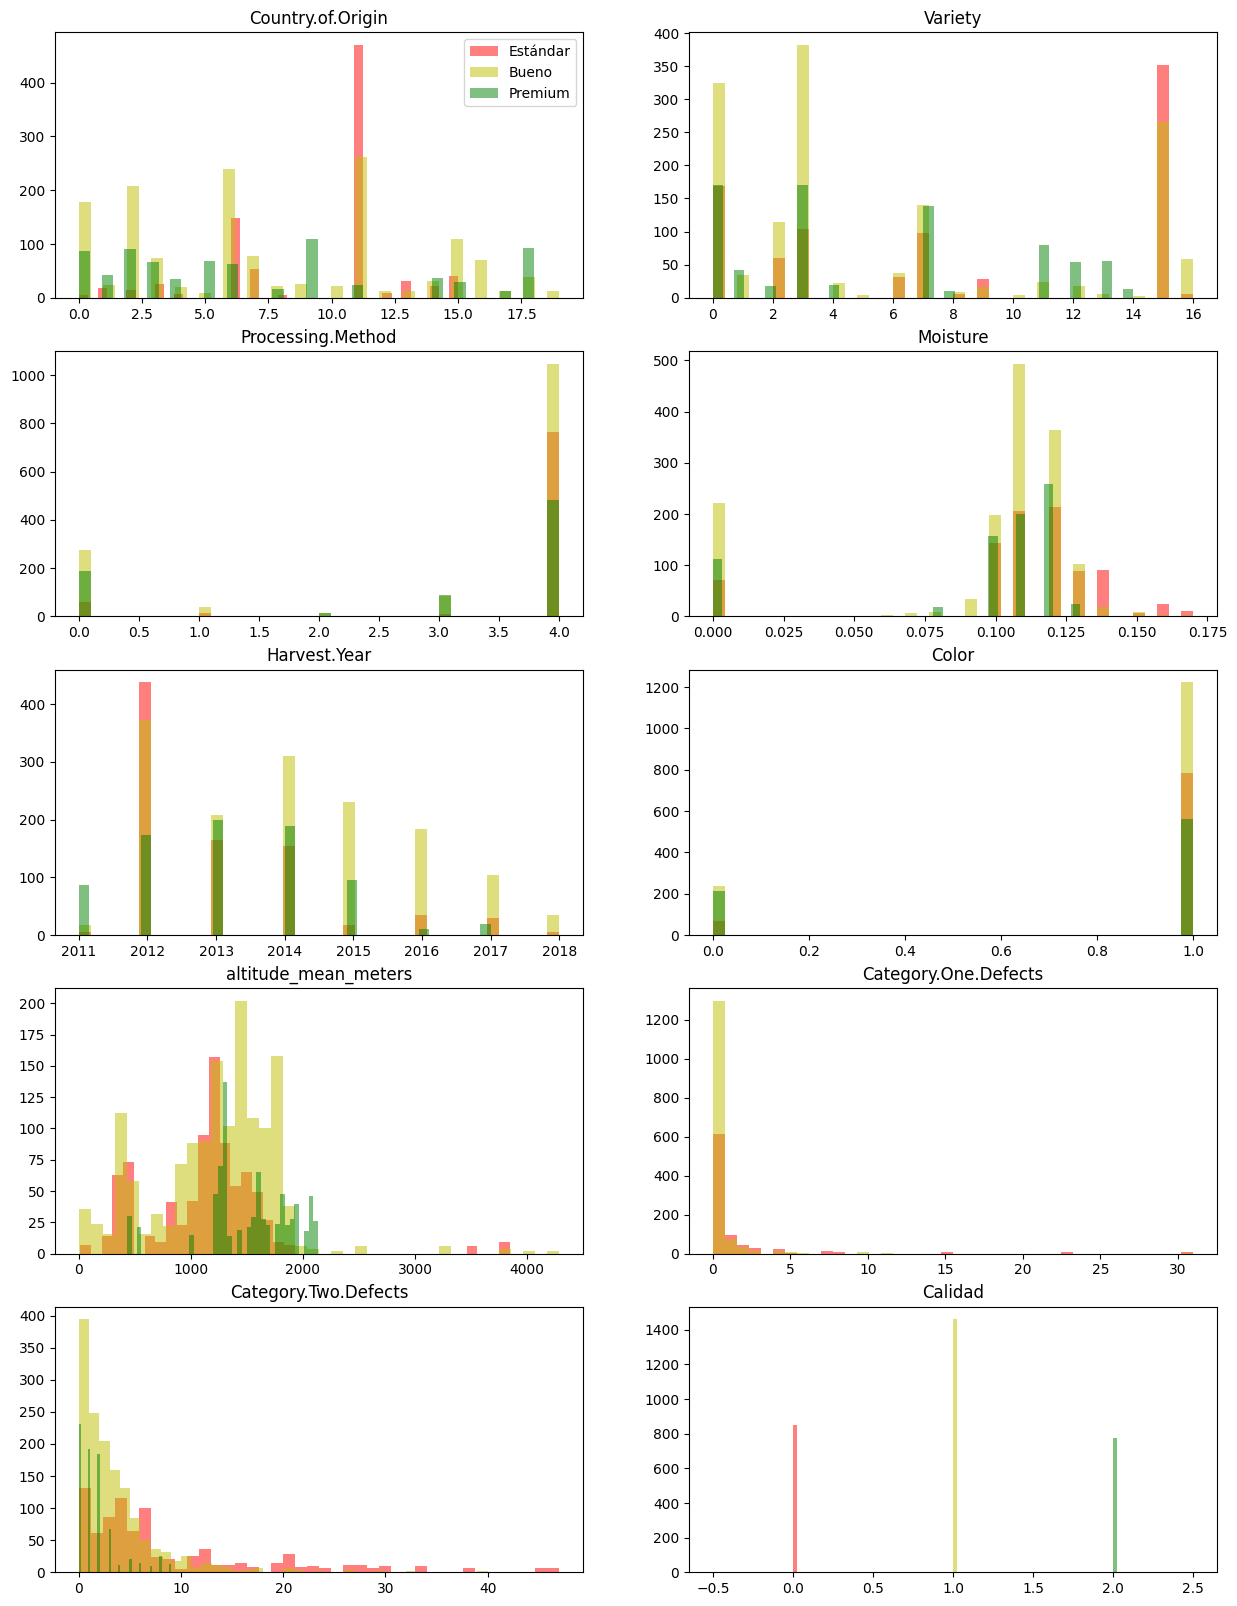

In [19]:
fig, axes = plt.subplots(5,2, figsize=(15,20))
estandar = procesado[procesado['Calidad']==0]
bueno = procesado[procesado['Calidad']==1]
premium = procesado[procesado['Calidad']==2]

axes = axes.ravel()
for i in range(len(procesado.columns)):
    axes[i].hist(estandar.values[:,i], bins=40, color='r', alpha =0.5)
    axes[i].hist(bueno.values[:,i], bins=40, color='y', alpha =0.5)
    axes[i].hist(premium.values[:,i], bins=40, color='g', alpha =0.5)
    axes[i].set_title(procesado.columns[i])

axes[0].legend(['Estándar', 'Bueno', 'Premium'])

En la gráfica se pueden observar datos importantes, como que a mayor cantidad de defectos la calidad del producto empeora, que la altitud media para una calidad óptima debe estar en un rango intermedio.  

También se puede observar que la distribución de las variables tampoco es estándar, pero tampoco es demasiado asimétrica.

## Correlación de Variables Procesadas

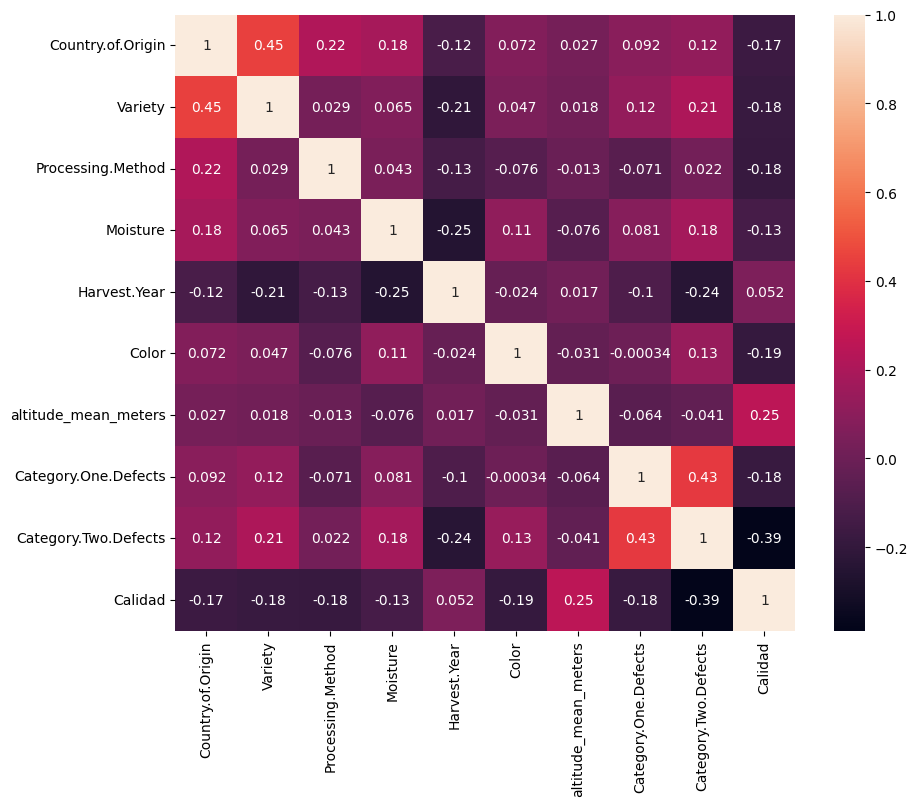

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(procesado.corr(), annot=True);

Se pueden observar ciertas variables correladas entre sí, como variedad y país y defectos de categoría 1 y 2; sin embargo, se mantendrán en el modelo final por las siguientes observaciones:

* El país y la variedad están relacionados, pero no son independientes: un país puede producir diferentes variedades; y la misma variedad puede ser producida en diferentes países.

* Los defectos pueden estar relacionados en cuestión de características (piedras, ramas, golpes), pero se diferencian en el grado de los mismos.

* Se han probado modelos sin alguna de las variables correlativas y las predicciones empeoran en lugar de mejorar.